# Analysis Pipeline


In [1]:
# Load the packages

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
from matplotlib import rcParams

# Load data and global variables

preprocessed_file = 'preprocessing/preprocessed.h5ad'
results_file = 'analysis/analysed.h5ad'

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read(preprocessed_file)

## Looking for gene expression patterns in reduced space

## Interferon regulatory factor 8 (IRF8)

- transcription factor
- part of the myeloid cell maturation

computing PCA
    with n_comps=50
    finished (0:00:00)


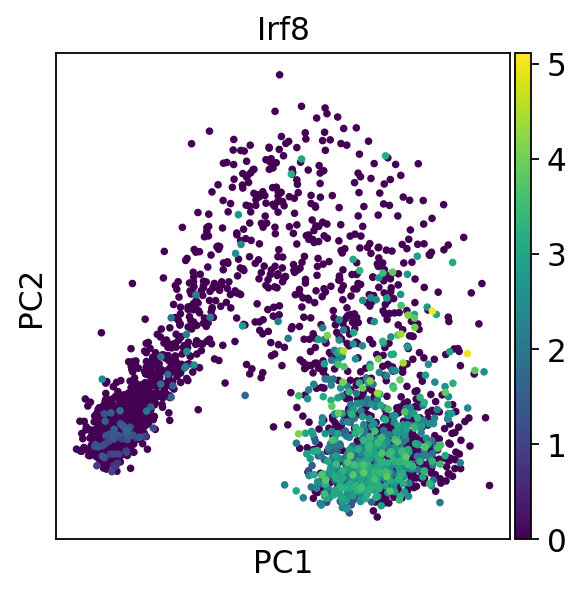

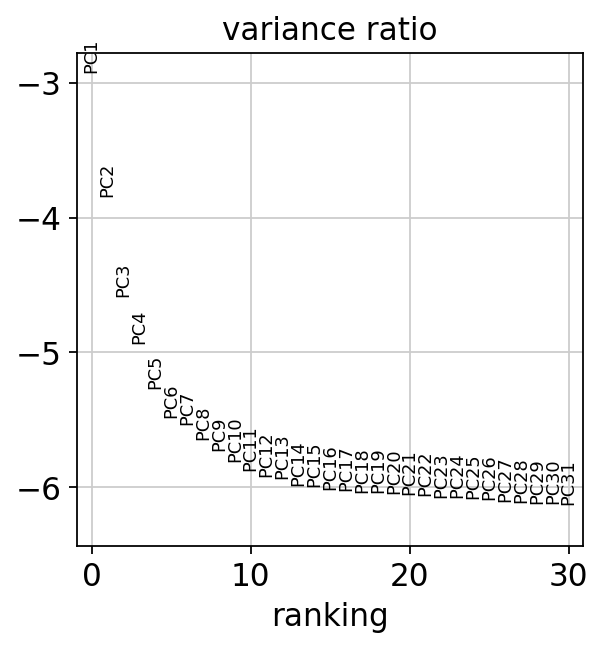

In [2]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='Irf8')
sc.pl.pca_variance_ratio(adata, log=True)

## The Marker Genes for today's workshop

| erythroid | neutrophil | monocyte |
|-----------|------------|----------|
| Gata2     | Elane      | Irf8     |
| Gata1     | Cebpe      | Csf1r    |
| Klf1      | Gfi1       | Ctsg     |
| Epor      |            |          |
| Hba-a2    |            |          |

## Neighborhood graph

### Computing the neighborhood graph

In [3]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


### Embedding the neighborhood graph

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


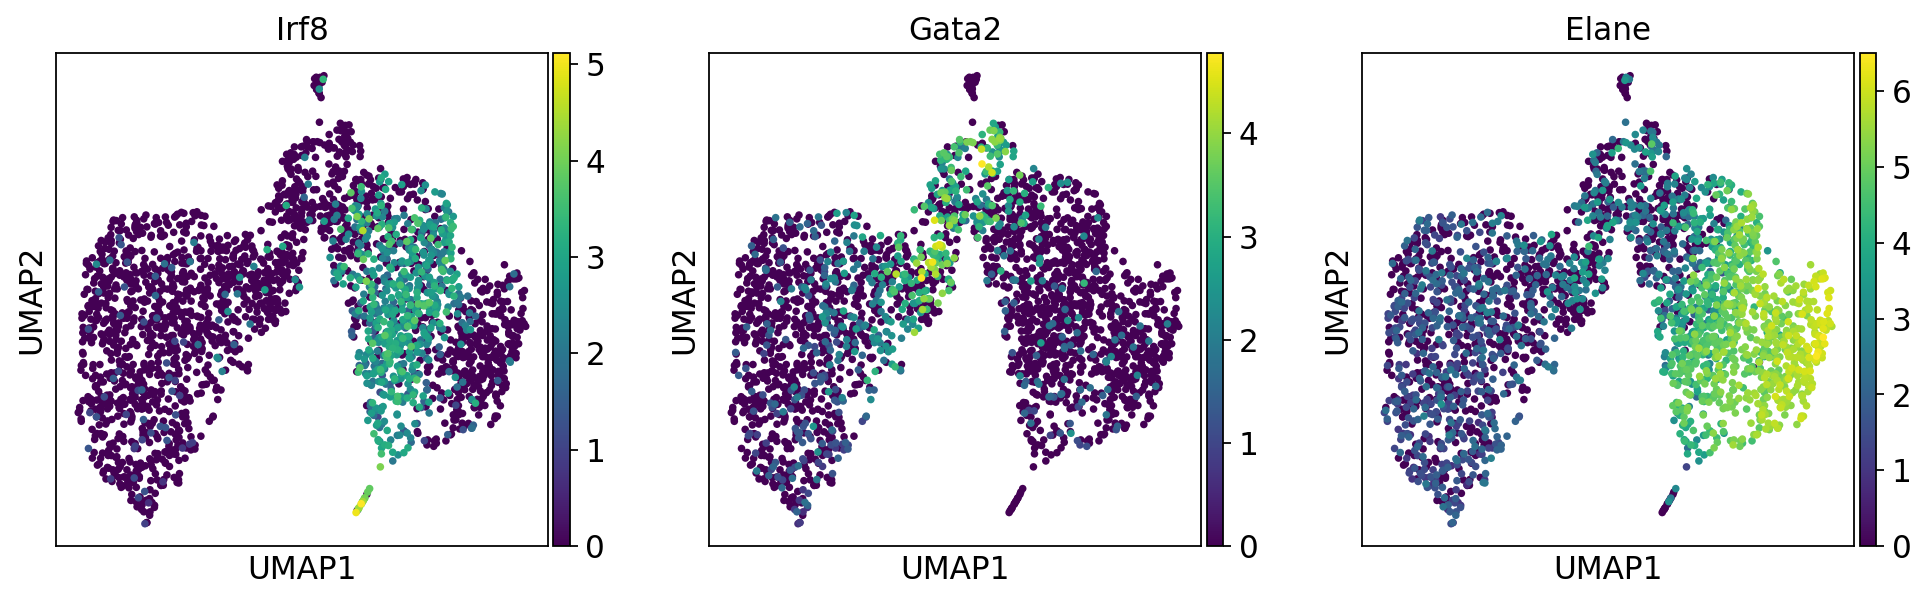

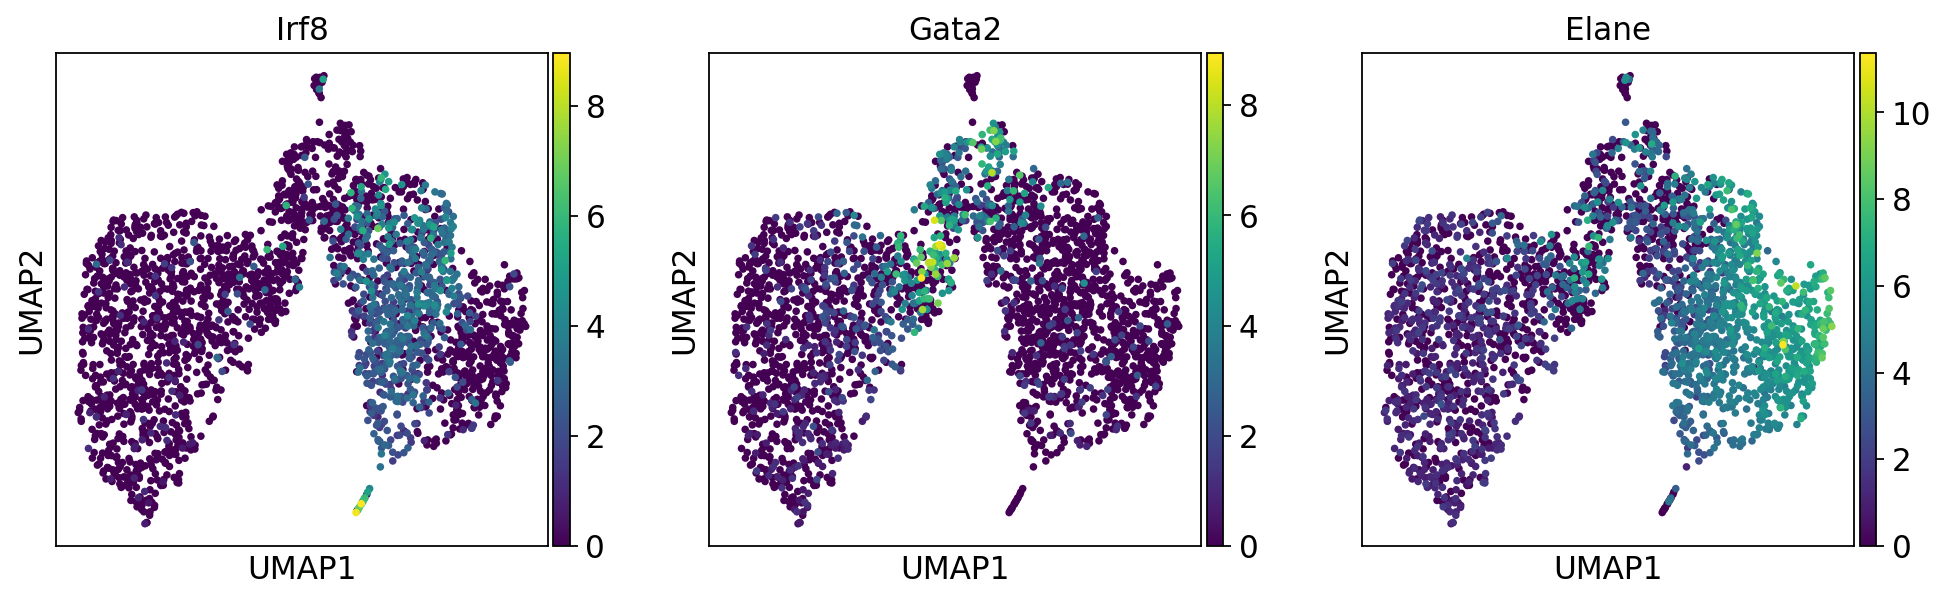

In [4]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Irf8', 'Gata2', 'Elane'])

sc.pl.umap(adata, color=['Irf8', 'Gata2', 'Elane'], use_raw=False)

### Clustering the neighborhood graph

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


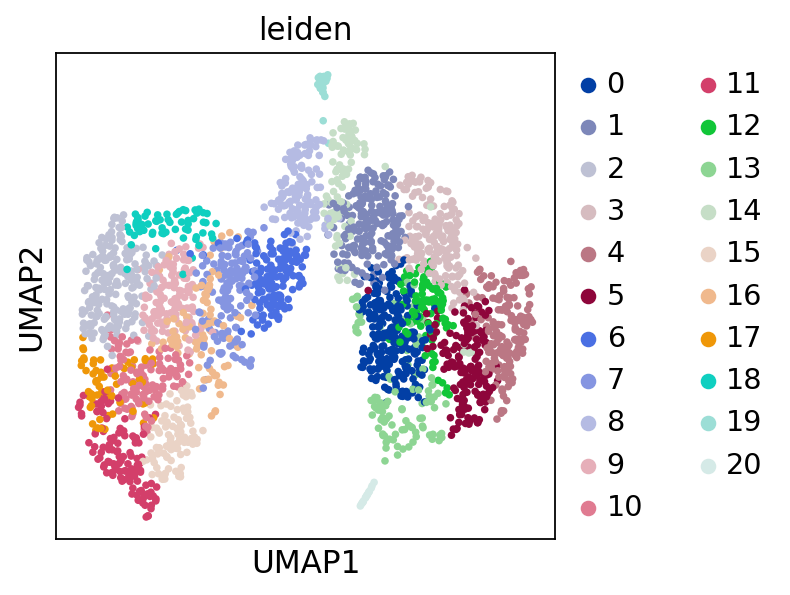

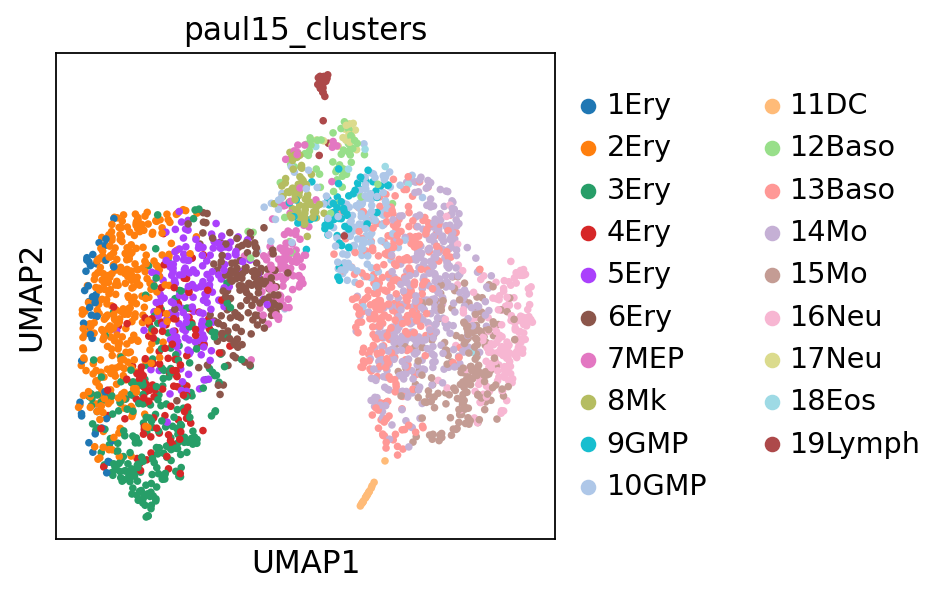

In [5]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['paul15_clusters'])

## Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


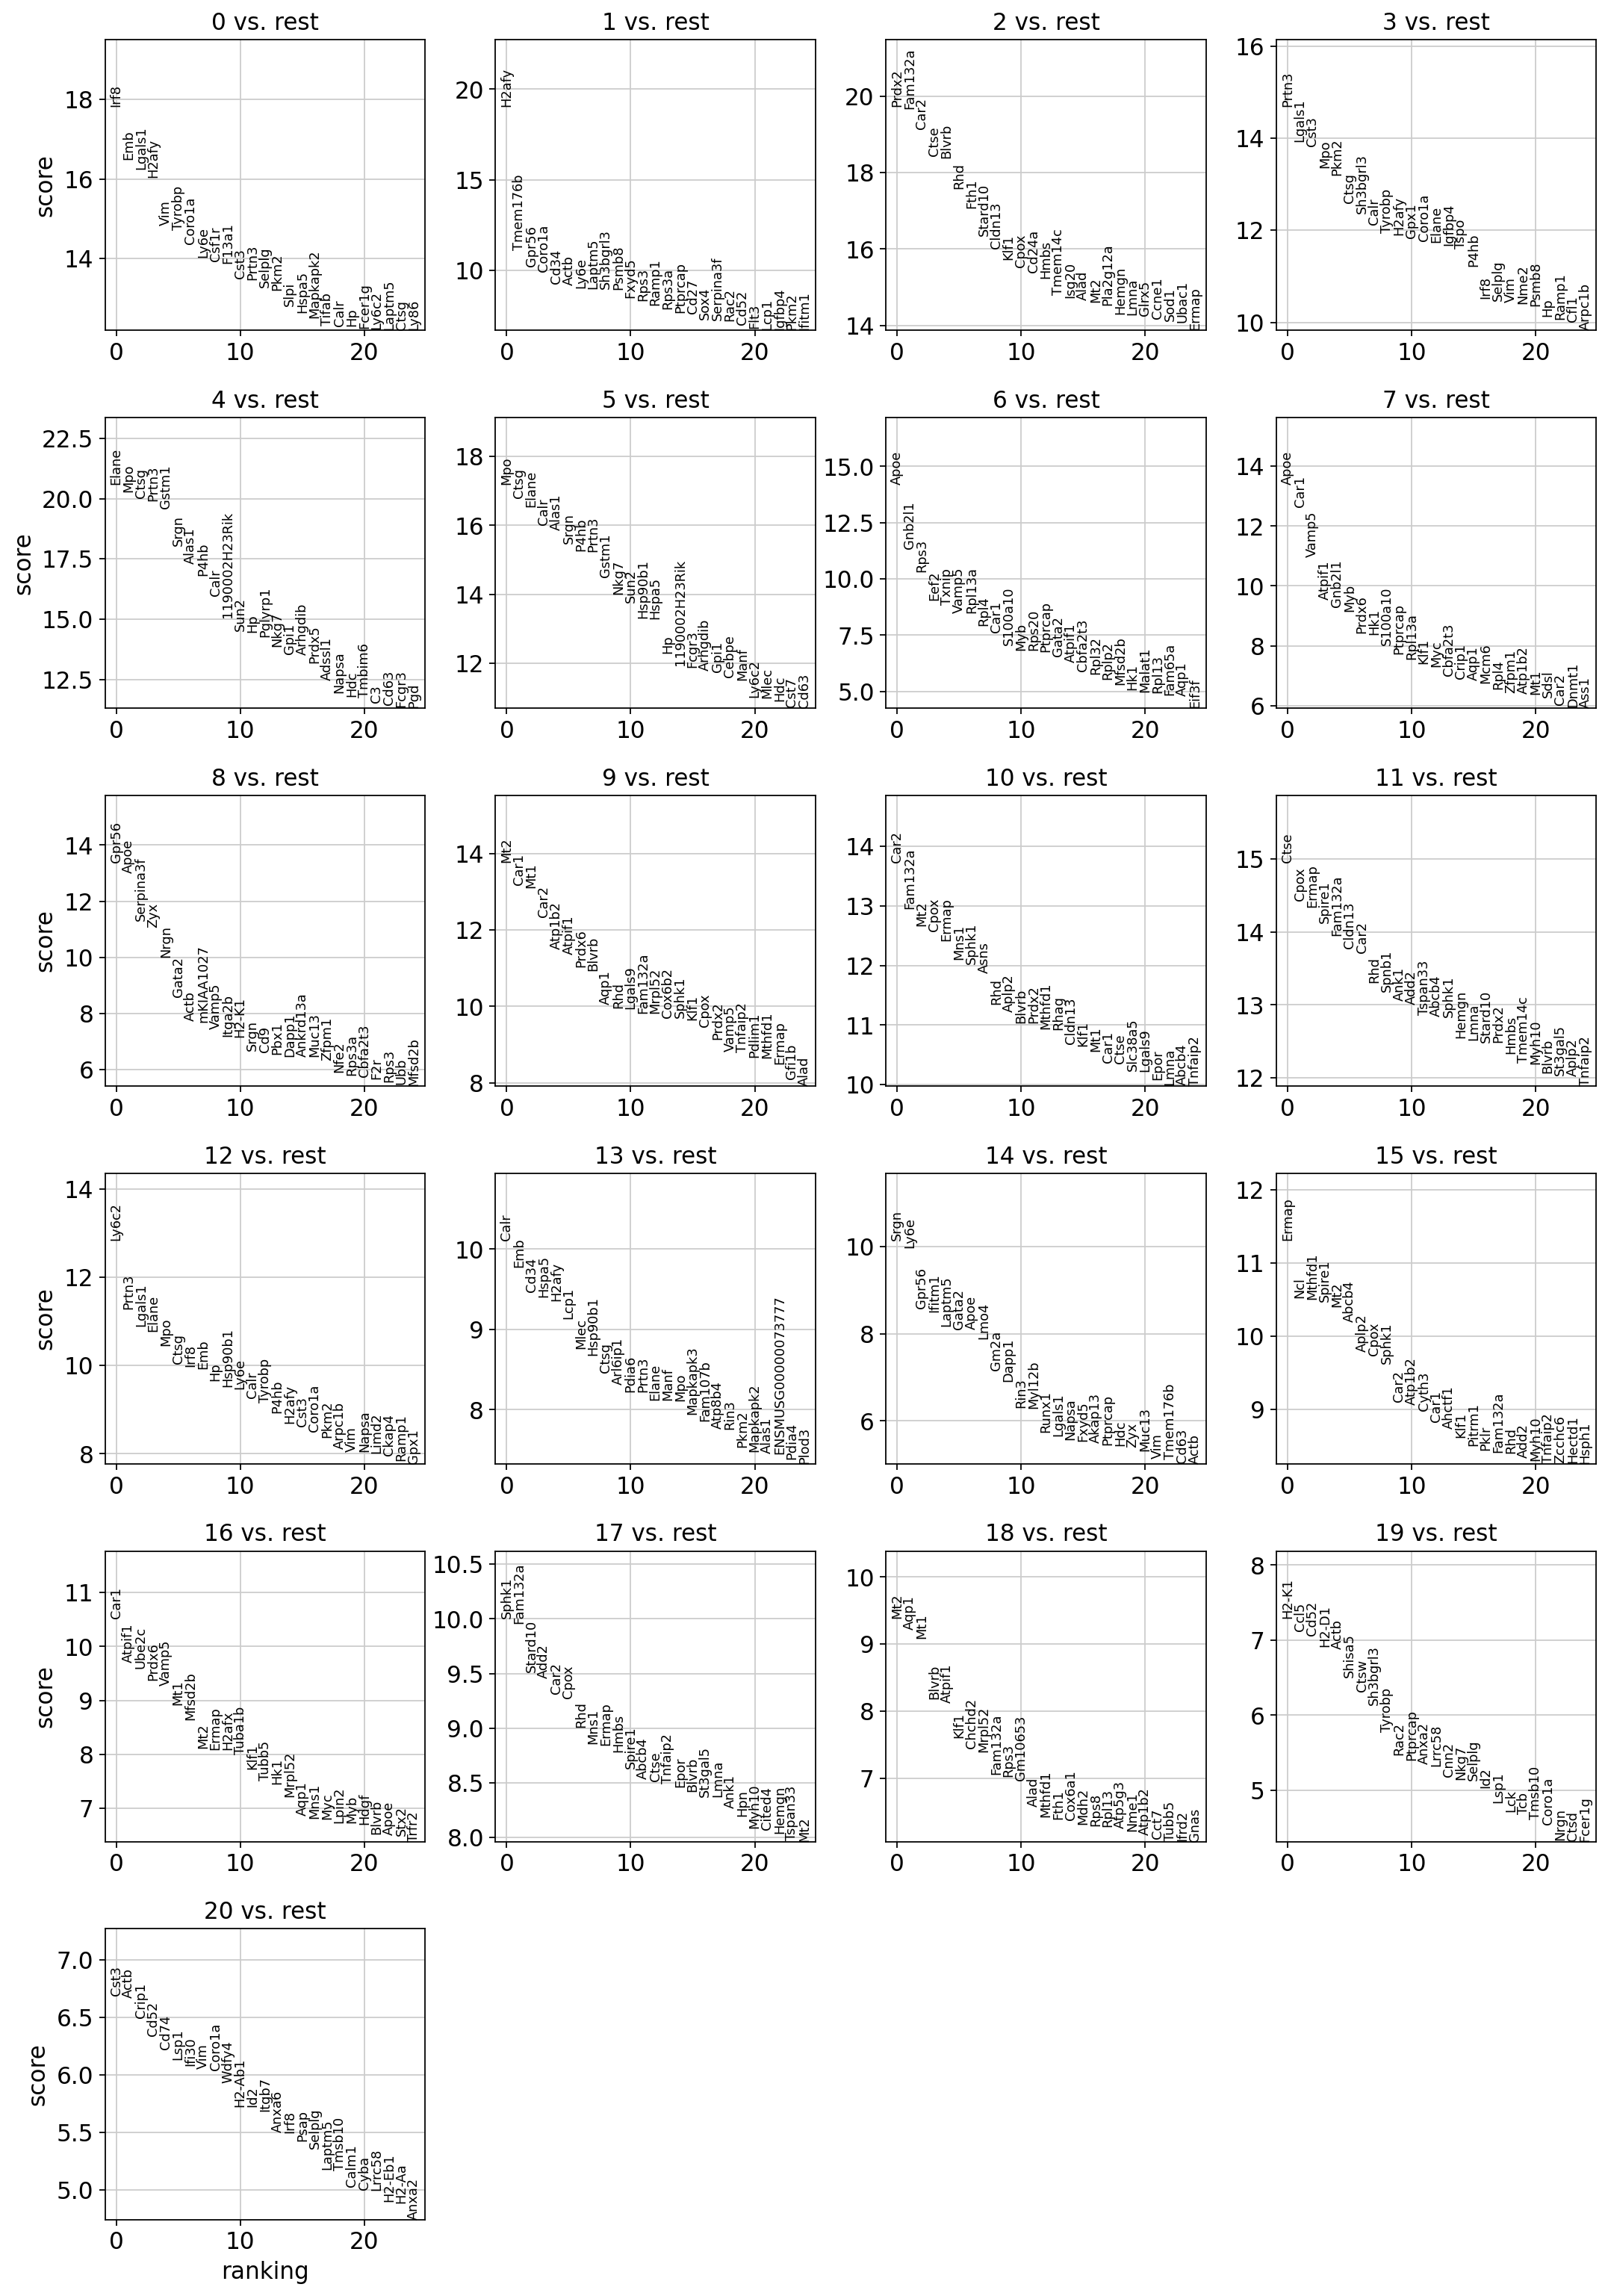

In [6]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
adata.write(results_file)
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg') the multi variate approach
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


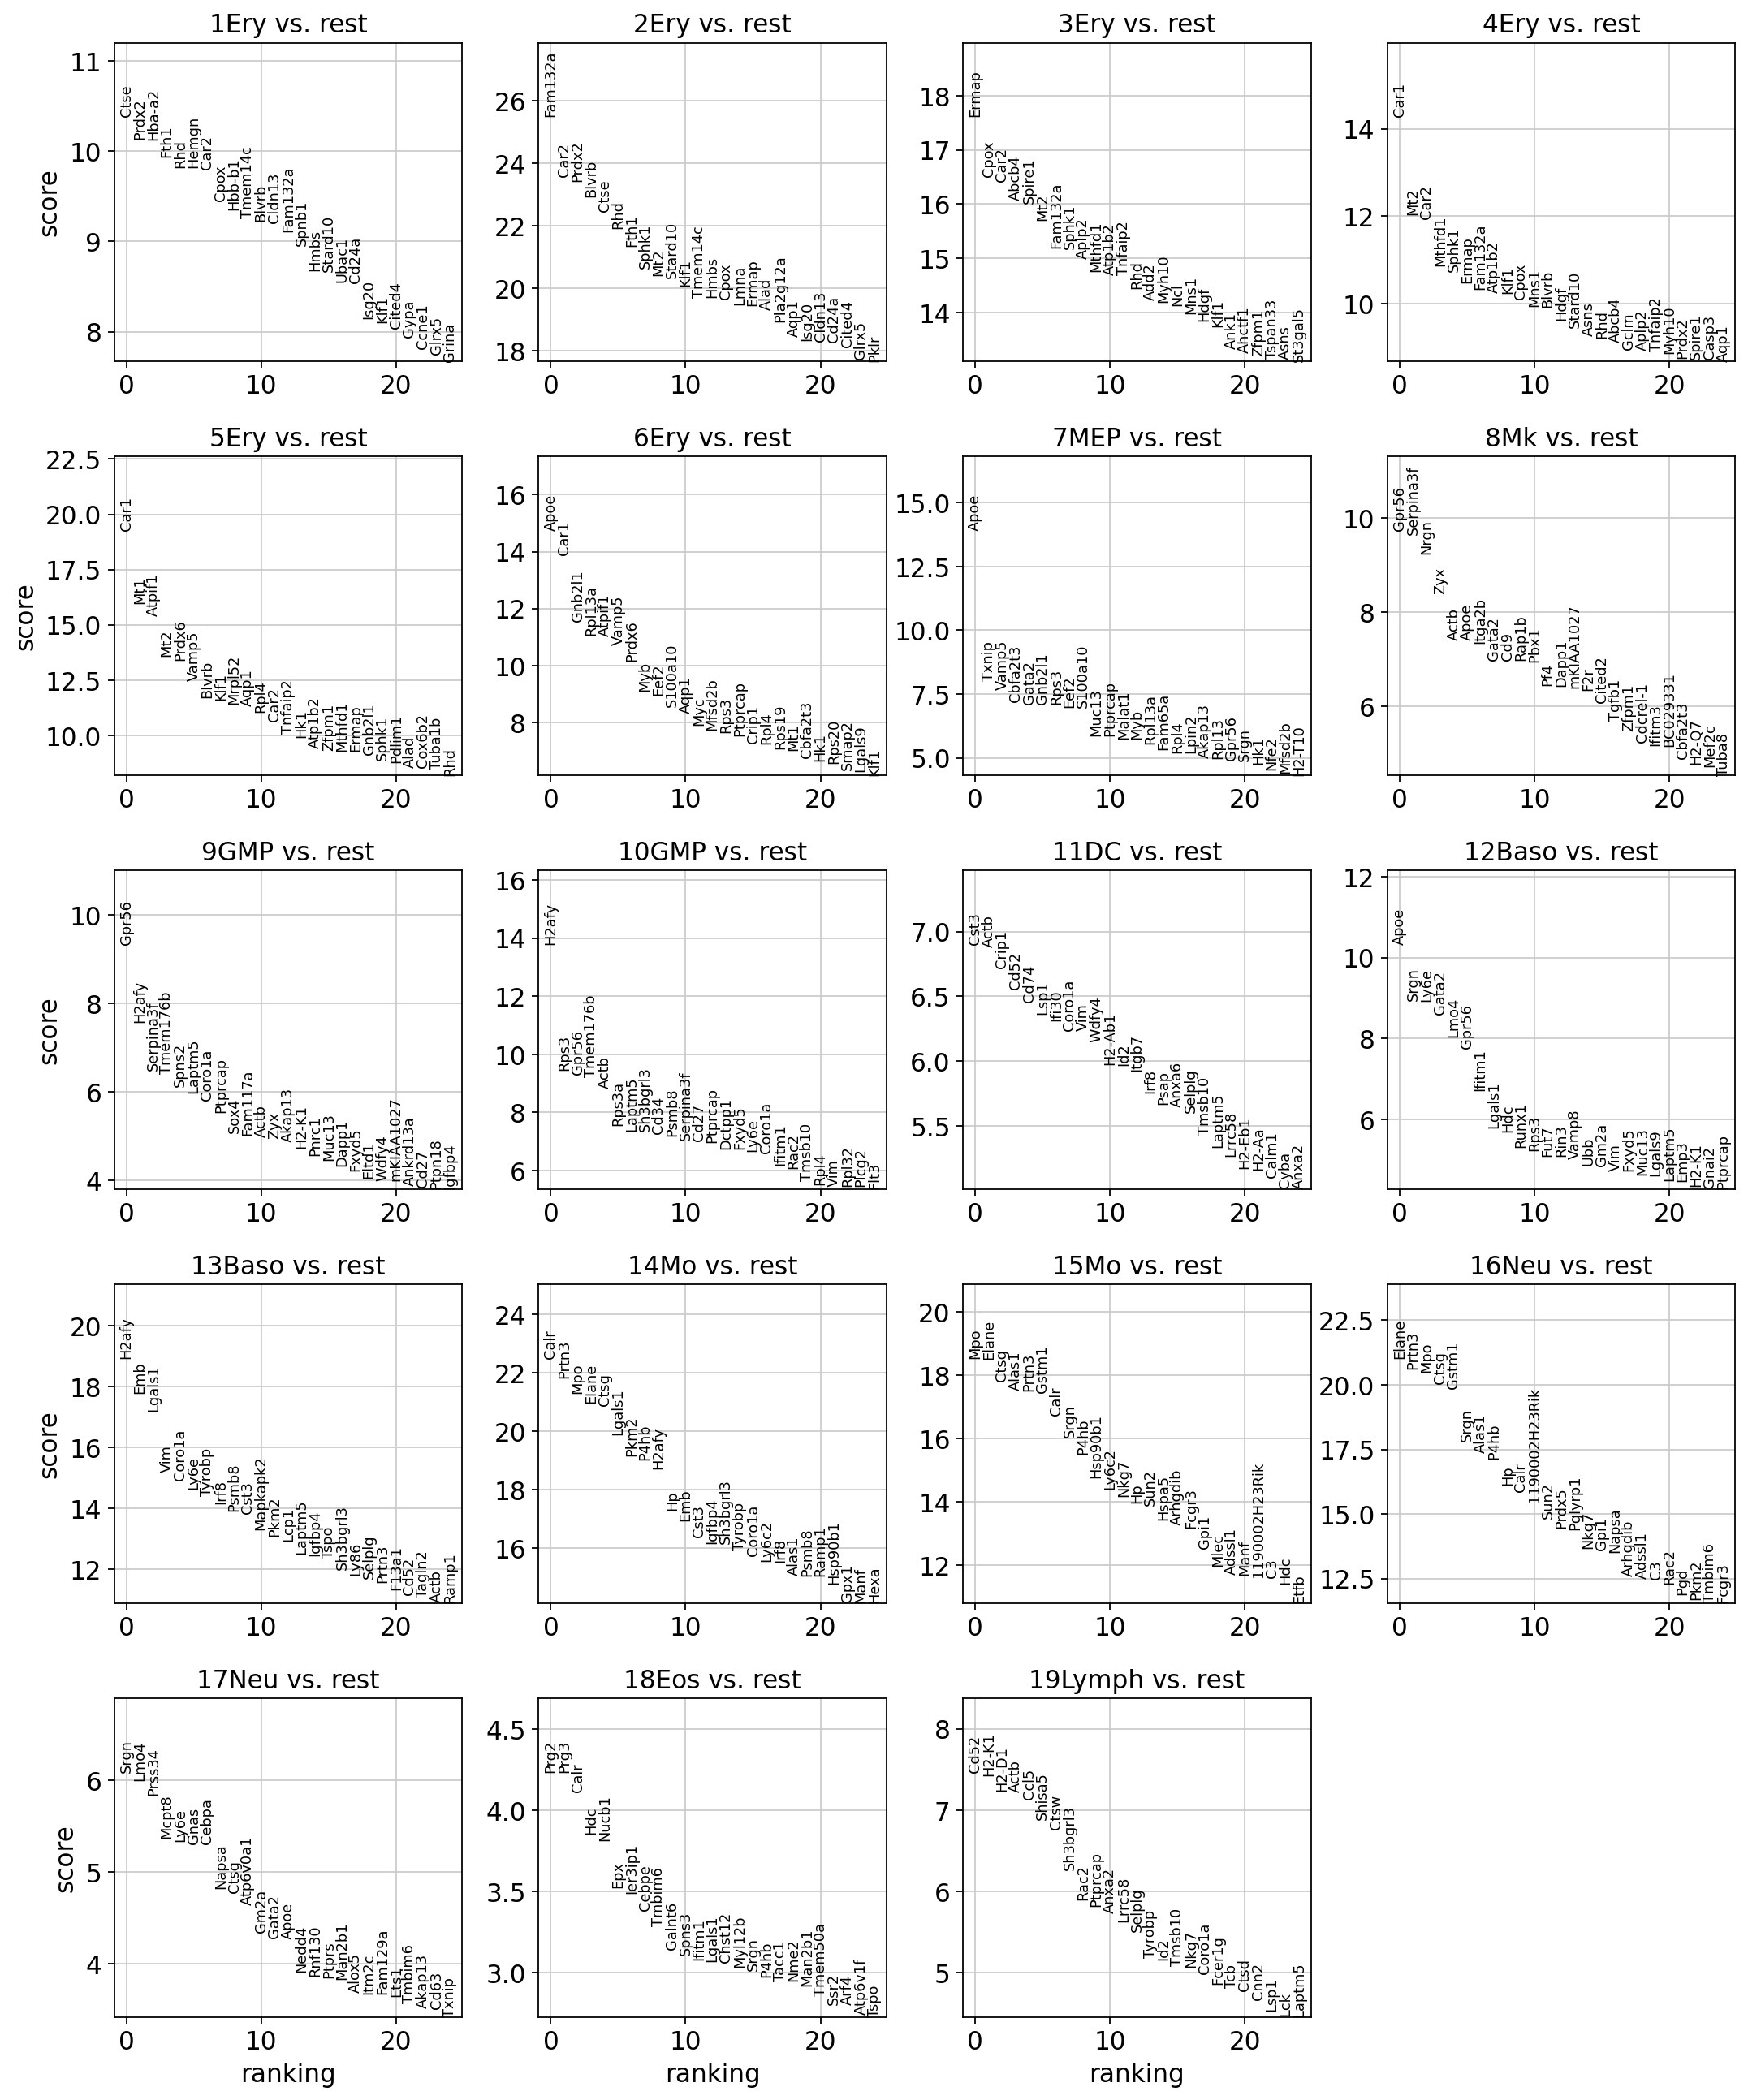

In [7]:
sc.tl.rank_genes_groups(adata, 'paul15_clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [8]:
adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0         1        2         3              4      5        6  \
0    Irf8     H2afy    Prdx2     Prtn3          Elane    Mpo     Apoe   
1     Emb  Tmem176b  Fam132a    Lgals1            Mpo   Ctsg   Gnb2l1   
2  Lgals1     Gpr56     Car2      Cst3           Ctsg  Elane     Rps3   
3   H2afy    Coro1a     Ctse       Mpo          Prtn3   Calr     Eef2   
4     Vim      Cd34    Blvrb      Pkm2          Gstm1  Alas1    Txnip   
5  Tyrobp      Actb      Rhd      Ctsg           Srgn   Srgn    Vamp5   
6  Coro1a      Ly6e     Fth1  Sh3bgrl3          Alas1   P4hb   Rpl13a   
7    Ly6e    Laptm5  Stard10      Calr           P4hb  Prtn3     Rpl4   
8   Csf1r  Sh3bgrl3   Cldn13    Tyrobp           Calr  Gstm1     Car1   
9   F13a1     Psmb8     Klf1     H2afy  1190002H23Rik   Nkg7  S100a10   

         7          8       9  ...       11       12       13      14      15  \
0     Apoe      Gpr56     Mt2  ...     Ctse    Ly6c2     Calr    Srgn   Ermap   
1     Car1       Apoe    Car1  ...     Cpox    Prtn3      Emb    Ly6e     Ncl   
2    Vamp5  Serpina3f     Mt1  ...    Ermap   Lgals1     Cd34   Gpr56  Mthfd1   
3   Atpif1        Zyx    Car2  ...   Spire1    Elane    Hspa5  Ifitm1  Spire1   
4   Gnb2l1       Nrgn  Atp1b2  ...  Fam132a      Mpo    H2afy  Laptm5     Mt2   
5      Myb      Gata2  Atpif1  ...   Cldn13     Ctsg     Lcp1   Gata2   Abcb4   
6    Prdx6       Actb   Prdx6  ...     Car2     Irf8     Mlec    Apoe   Aplp2   
7      Hk1  mKIAA1027   Blvrb  ...      Rhd      Emb  Hsp90b1    Lmo4    Cpox   
8  S100a10      Vamp5    Aqp1  ...    Spnb1       Hp     Ctsg    Gm2a   Sphk1   
9  Ptprcap     Itga2b     Rhd  ...     Ank1  Hsp90b1  Arl6ip1   Dapp1    Car2   

       16       17       18        19      20  
0    Car1    Sphk1      Mt2     H2-K1    Cst3  
1  Atpif1  Fam132a     Aqp1      Ccl5    Actb  
2   Ube2c  Stard10      Mt1      Cd52   Crip1  
3   Prdx6     Add2    Blvrb     H2-D1    Cd52  
4   Vamp5     Car2   Atpif1      Actb    Cd74  
5     Mt1     Cpox     Klf1    Shisa5    Lsp1  
6  Mfsd2b      Rhd   Chchd2      Ctsw   Ifi30  
7     Mt2     Mns1   Mrpl52  Sh3bgrl3     Vim  
8   Ermap    Ermap  Fam132a    Tyrobp  Coro1a  
9   H2afx     Hmbs     Rps3      Rac2   Wdfy4  

[10 rows x 21 columns]

### Compare 2 clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


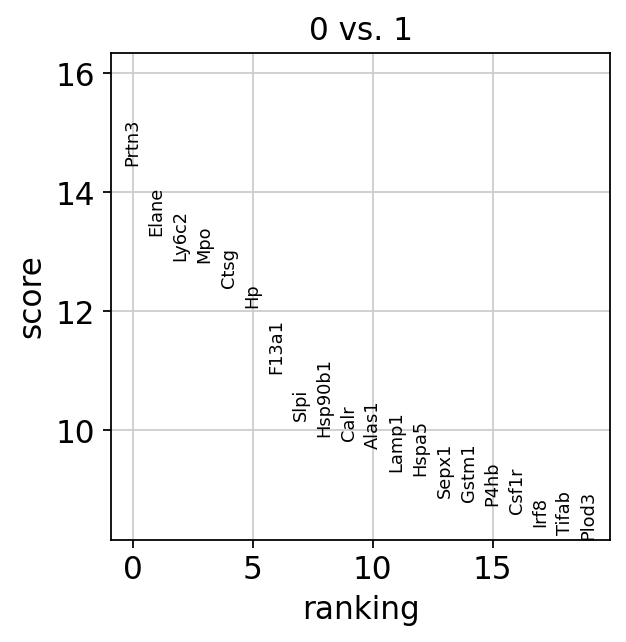

In [9]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)
adata = sc.read(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


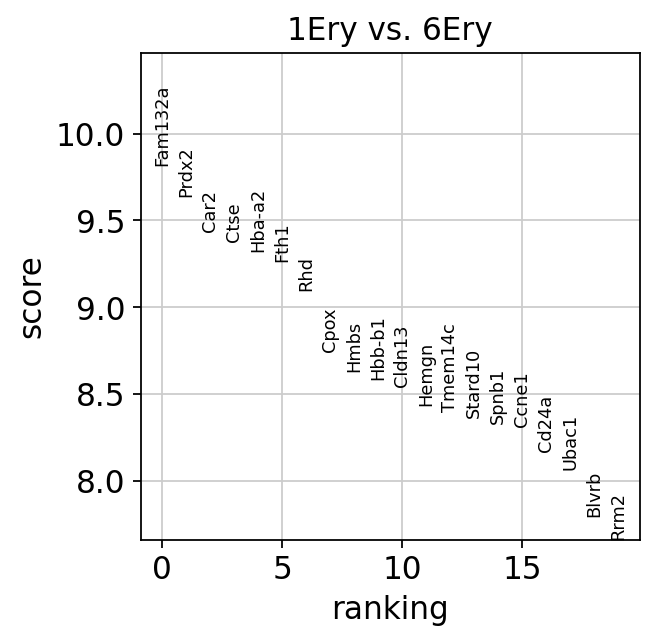

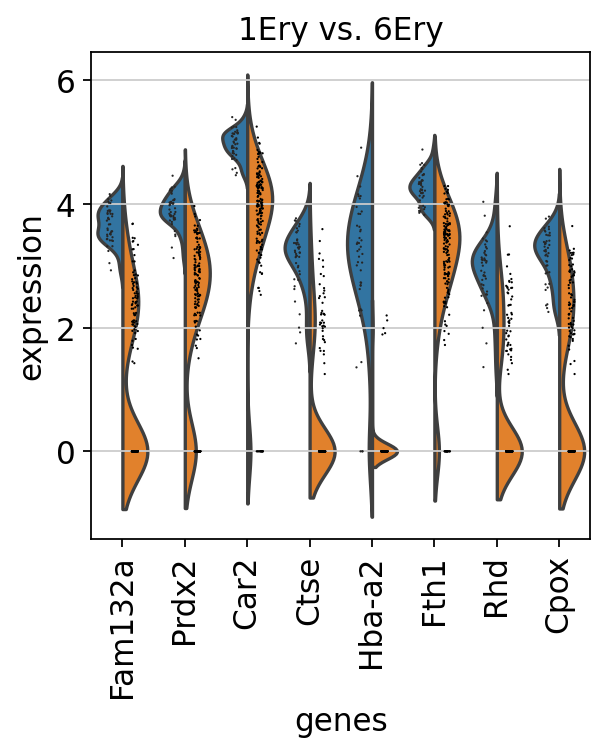

In [10]:
sc.tl.rank_genes_groups(adata, 'paul15_clusters', groups=['1Ery'], reference='6Ery', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1Ery'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups='1Ery', n_genes=8)
adata = sc.read(results_file)

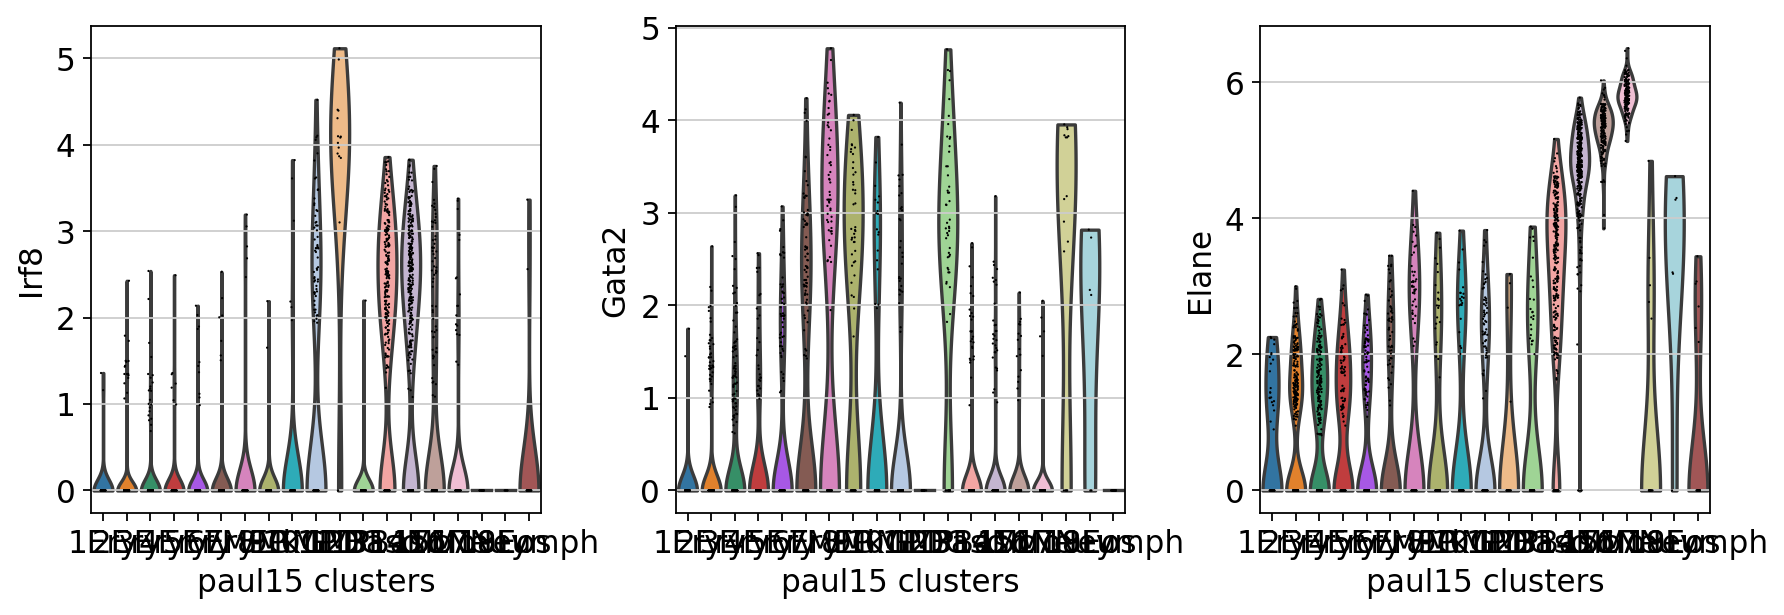

In [11]:
sc.pl.violin(adata, ['Irf8', 'Gata2', 'Elane'], groupby='paul15_clusters')

### Generic Comparissons

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_paul15_clusters']`


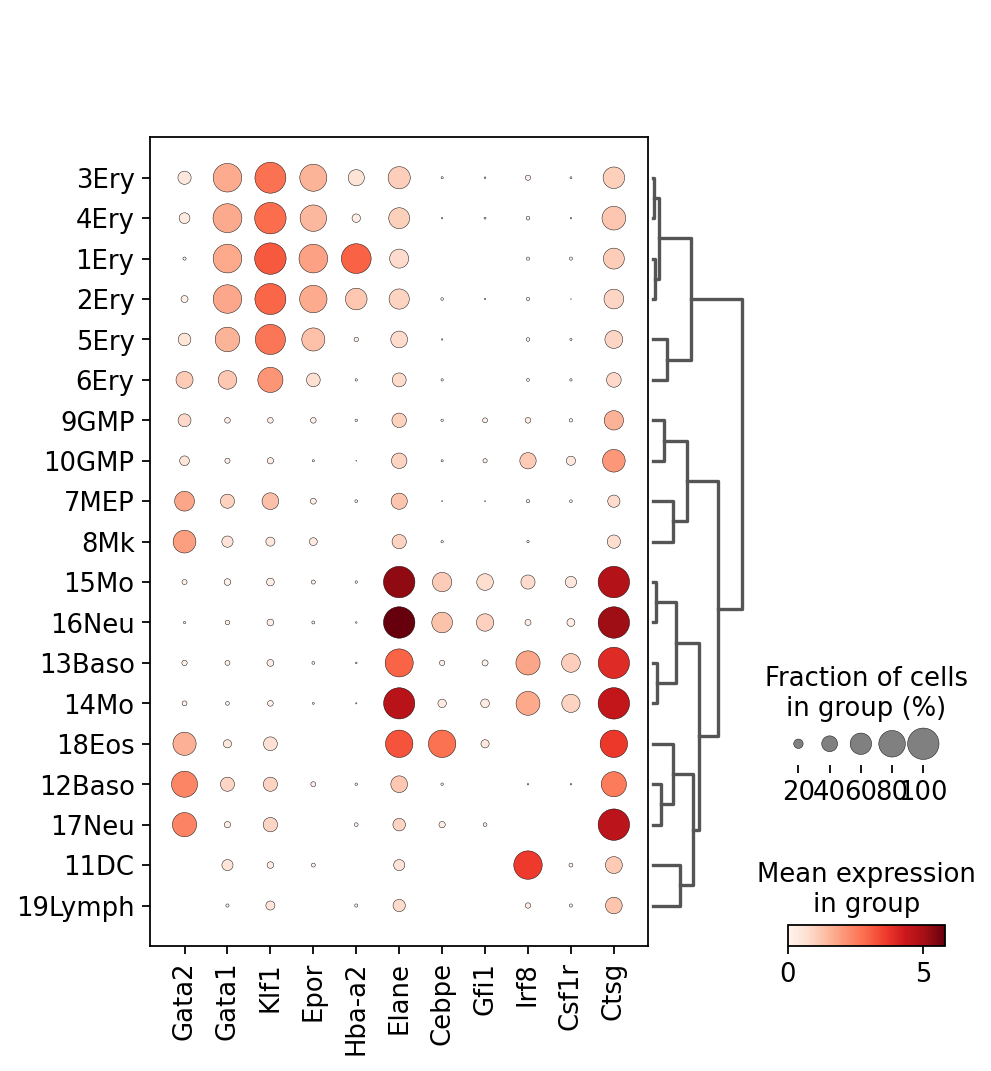

In [12]:
gene_names = ['Gata2', 'Gata1', 'Klf1', 'Epor', 'Hba-a2',  # erythroid
              'Elane', 'Cebpe', 'Gfi1',                    # neutrophil
              'Irf8', 'Csf1r', 'Ctsg']                     # monocyte


sc.pl.dotplot(adata, gene_names, 'paul15_clusters', dendrogram=True)

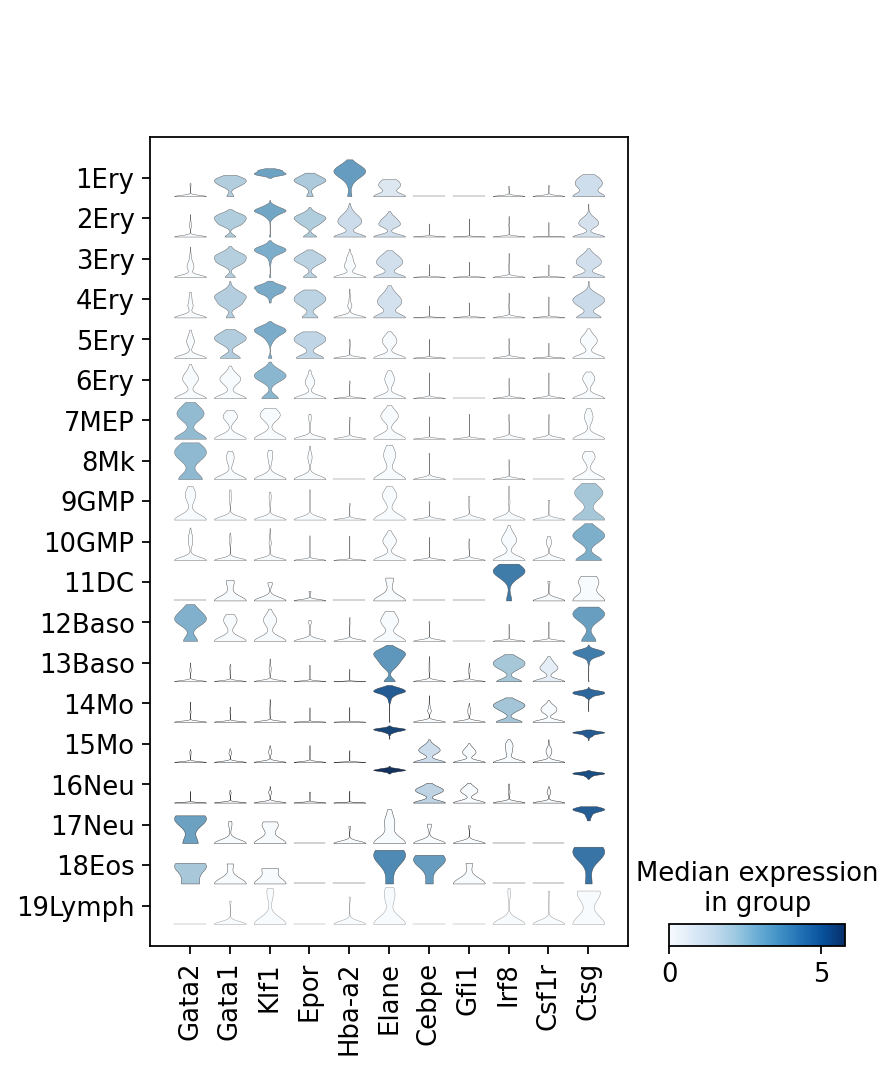

In [13]:
sc.pl.stacked_violin(adata, gene_names, groupby='paul15_clusters', rotation=90);

## Trajectory Inference

### Pseudotime

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


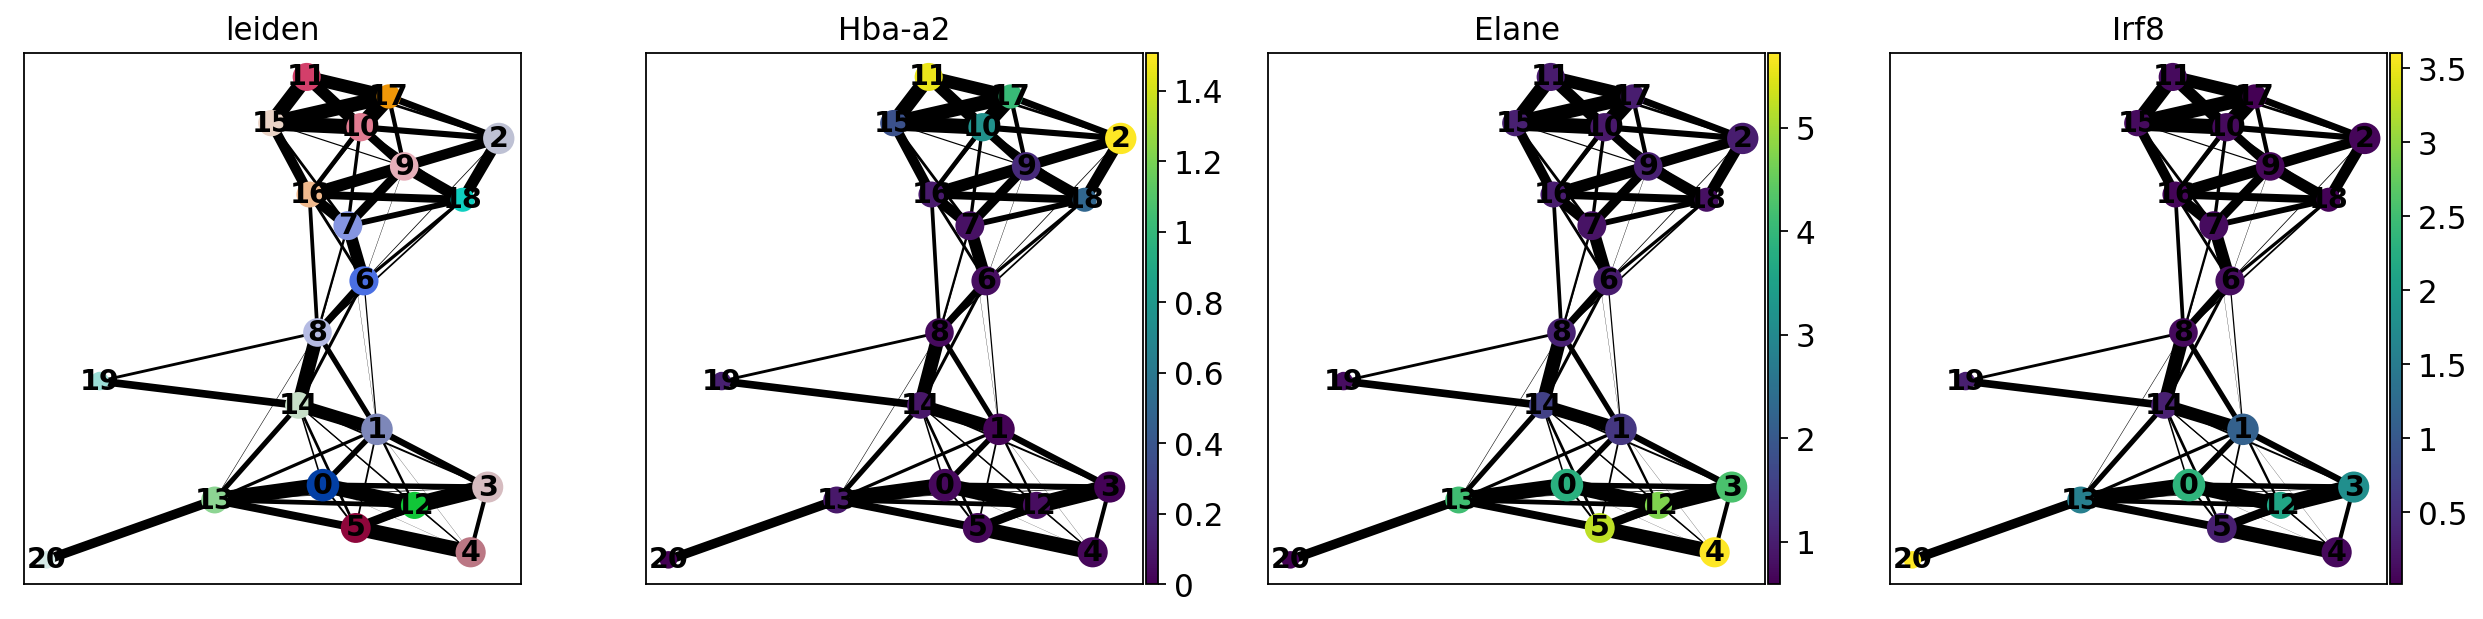

--> added 'pos', the PAGA positions (adata.uns['paga'])


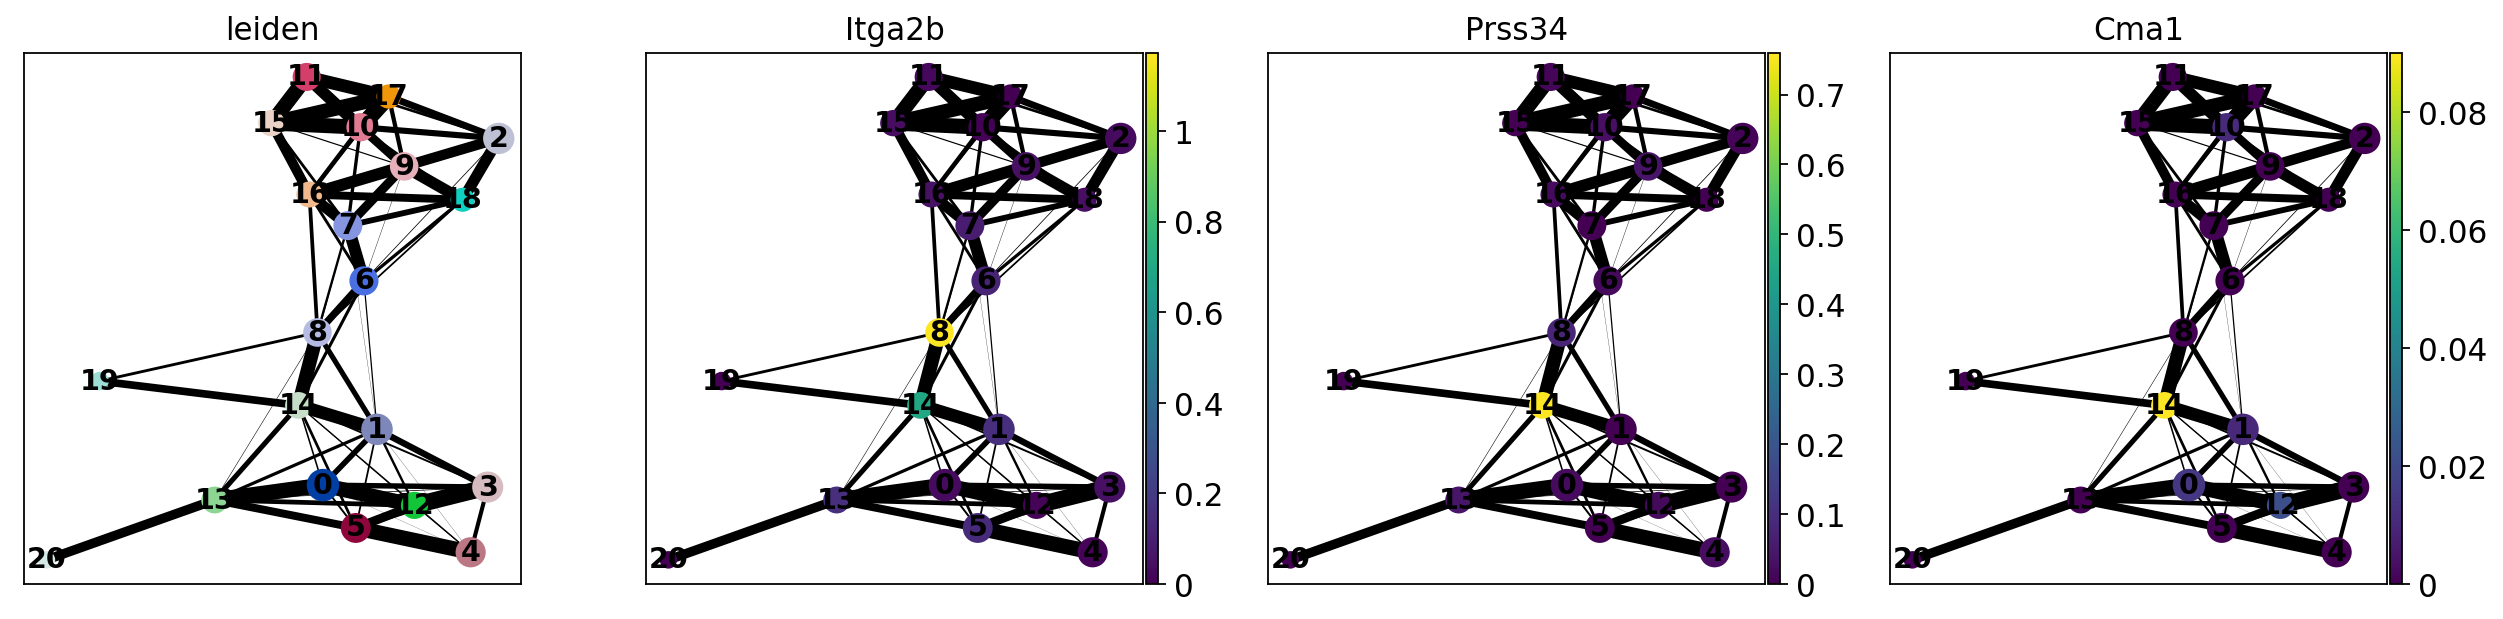

NameError: name 'Stem' is not defined

In [14]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'Hba-a2', 'Elane', 'Irf8'])
sc.pl.paga(adata, color=['leiden', 'Itga2b', 'Prss34', 'Cma1'])

adata.obs['leiden'].cat.categories
adata.obs['leiden_anno'] = adata.obs['leiden']

/Stem
adata.obs['leiden_anno'].cat.categories = ['0/Stem', '1', '2', '3', '4', '5', '6/Ery', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

sc.tl.paga(adata, groups='louvain_anno')
sc.pl.paga(adata, threshold=0.03, show=False)